In [11]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# === LOAD DATASET ===
CSV_PATH = Path("../data/student_data.csv")
df = pd.read_csv(CSV_PATH, sep=";")

# === Normalisasi Kolom ===
def to_snake(s: str) -> str:
    return (
        s.strip()
        .replace("/", " ").replace("-", " ").replace(".", " ")
        .replace("(", " ").replace(")", " ")
        .replace("’", "").replace("'", "")
        .lower().replace(" ", "_")
    )

df.columns = [to_snake(c) for c in df.columns]

# === Siapkan fitur dan target ===
target_col = "target"
X = df.drop(columns=[target_col])
y = df[target_col]

# === Pisahkan numerik dan kategorikal ===
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns

# === Preprocessor ===
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# === Train test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Train Random Forest ===
rf_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("FULL SETUP BERHASIL ✓ Semua variabel sudah siap!")


FULL SETUP BERHASIL ✓ Semua variabel sudah siap!


In [6]:
cm = confusion_matrix(y_test, y_pred_rf, labels=['Dropout', 'Enrolled', 'Graduate'])
cm


array([[215,  23,  46],
       [ 42,  54,  63],
       [ 12,  20, 410]])

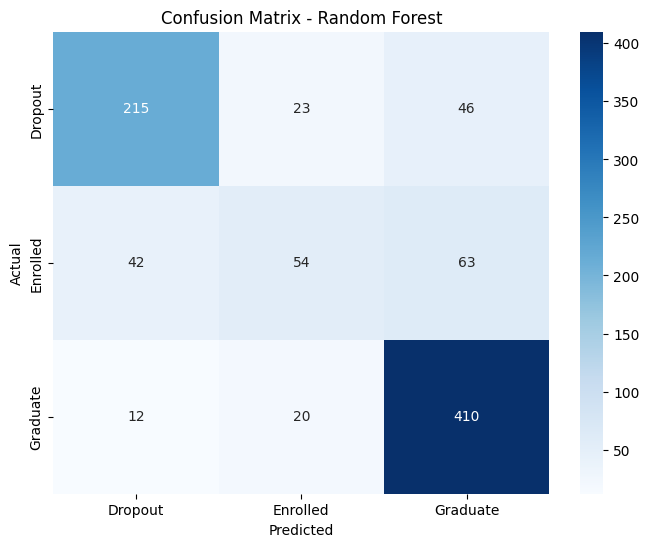

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Dropout', 'Enrolled', 'Graduate'],
            yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [9]:
import pandas as pd
import numpy as np
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# === LOAD DATASET ===
CSV_PATH = Path("../data/student_data.csv")
df = pd.read_csv(CSV_PATH, sep=";")

# === Normalisasi Kolom ===
def to_snake(s: str) -> str:
    return (
        s.strip()
        .replace("/", " ").replace("-", " ").replace(".", " ")
        .replace("(", " ").replace(")", " ")
        .replace("’", "").replace("'", "")
        .lower().replace(" ", "_")
    )

df.columns = [to_snake(c) for c in df.columns]

# === Siapkan fitur dan target ===
target_col = "target"
X = df.drop(columns=[target_col])
y = df[target_col]

# === Pisahkan numerik dan kategorikal ===
num_cols = X.select_dtypes(include="number").columns
cat_cols = X.select_dtypes(exclude="number").columns

# === Preprocessor ===
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# === Train test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Train ulang Random Forest ===
rf_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)

# === Prediksi ===
y_pred_rf = rf_model.predict(X_test)

print("FULL SETUP BERHASIL ✓ (Semua variabel sudah siap!)")


FULL SETUP BERHASIL ✓ (Semua variabel sudah siap!)


In [13]:
import pandas as pd
import numpy as np

# Ambil model Random Forest dari pipeline
rf = rf_model.named_steps["model"]

# Karena semua fitur numerik, nama fitur = num_cols
feature_names = list(num_cols)

print("Jumlah fitur:", len(feature_names))
print("Bentuk importance:", rf.feature_importances_.shape)


Jumlah fitur: 36
Bentuk importance: (36,)


In [14]:
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": rf.feature_importances_
})

# Urutkan dari yang paling penting
feat_imp = feat_imp.sort_values("importance", ascending=False)

feat_imp.head(20)


,feature,importance
30,curricular_units_2nd_sem__approved_,0.155237
31,curricular_units_2nd_sem__grade_,0.091563
24,curricular_units_1st_sem__approved_,0.089231
25,curricular_units_1st_sem__grade_,0.065268
12,admission_grade,0.043532
16,tuition_fees_up_to_date,0.039944
19,age_at_enrollment,0.039607
29,curricular_units_2nd_sem__evaluations_,0.038053
6,previous_qualification__grade_,0.037818
23,curricular_units_1st_sem__evaluations_,0.037156


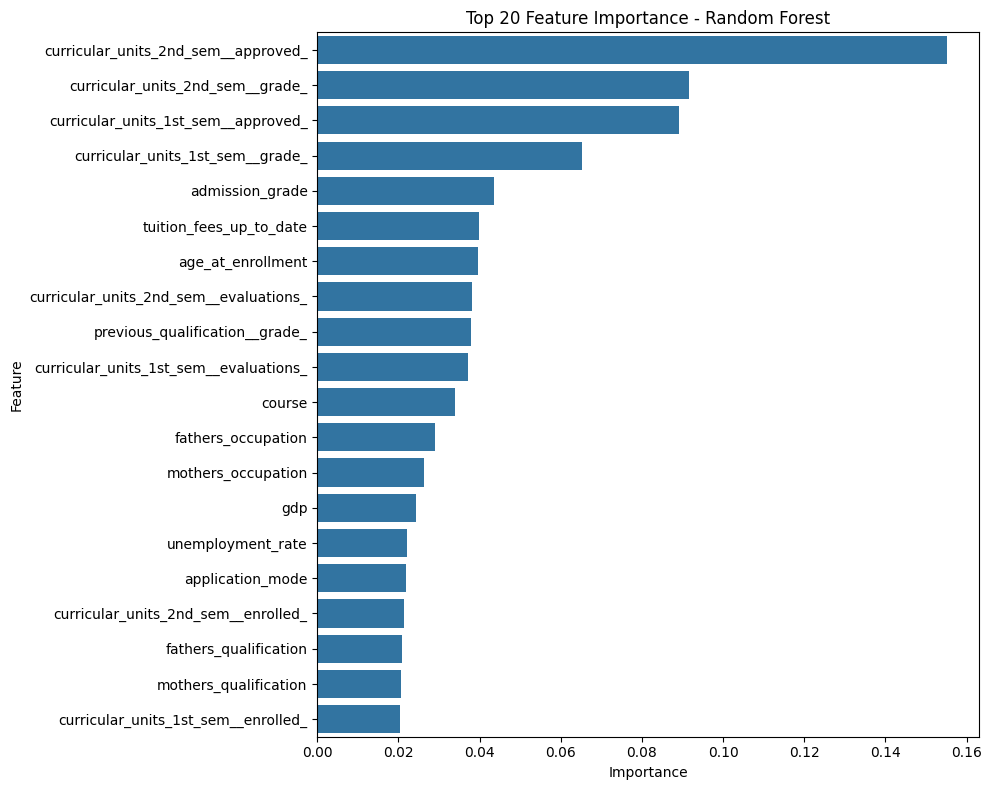

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(
    data=feat_imp.head(20),
    x="importance",
    y="feature"
)
plt.title("Top 20 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
